# Installation

In [1]:
!git clone https://github.com/Nagim123/movie-recommender-system.git

Cloning into 'movie-recommender-system'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 255 (delta 26), reused 39 (delta 12), pack-reused 199
Receiving objects: 100% (255/255), 48.81 MiB | 18.44 MiB/s, done.
Resolving deltas: 100% (94/94), done.


In [2]:
%%capture
import torch
import os

# We need to get the version of PyTorch installed on machine to install appropriate version
# of other libraries that we need
print("PyTorch has version {}".format(torch.__version__))
os.environ['TORCH'] = torch.__version__

# Check if everything is correctly installed
if 'IS_GRADESCOPE_ENV' not in os.environ:
    # If not then install all requiered libraries versions directly.
    !pip install ogb
    !pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
    !pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
    !pip install pyg-lib -f https://data.pyg.org/whl/nightly/torch-${TORCH}.html
    !pip install git+https://github.com/pyg-team/pytorch_geometric.git

In [3]:
%cd movie-recommender-system/

/content/movie-recommender-system


# Training
The training will be demonstrated on first subset of MovieLens dataset

In [4]:
!python train_model.py 1 --epochs 30

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:340: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set 'set()'. Please explicitly set 'num_nodes' as an attribute of 'data[_global_store]' to suppress this warning
  warnings.warn(
100% 275/275 [00:30<00:00,  9.12it/s]
Epoch: 0, train_loss: 1.1528, val_loss: 1.0631
100% 275/275 [00:29<00:00,  9.37it/s]
Epoch: 1, train_loss: 1.0657, val_loss: 1.0194
100% 275/275 [00:26<00:00, 10.47it/s]
Epoch: 2, train_loss: 1.0316, val_loss: 0.9930
100% 275/275 [00:25<00:00, 10.93it/s]
Epoch: 3, train_loss: 1.0130, val_loss: 0.9792
100% 275/275 [00:27<00:00, 10.06it/s]
Epoch: 4, train_loss: 1.0022, val_loss: 0.9735
100% 275/275 [00:27<00:00, 10.00it/s]
Epoch: 5, train_loss: 0.9949, val_loss: 0.9674
100% 275/275 [00:27<00:00, 10.04it/s]
Epoch: 6, train_loss: 0.9886, val_loss: 0.9639
100% 275/275 [00:27<00:00, 10.16it/s]
Epoch: 7, train_loss: 0.9846, val_loss: 0.9614
100% 275/275 [00:26<00:00, 10.28it/s]
Epoc

# Evaluation

In [5]:
!python predict.py 1

In [9]:
!python benchmark/evaluate.py 1

100% 943/943 [00:02<00:00, 359.60it/s]
Precision@20 = 0.5983487749696091
Recall@20 = 0.6746323637124542
NDCG@20 = 0.6111855374854681
RMSE = 1.2534984350204468


In [10]:
!python benchmark/visualize.py --loss train_1.txt

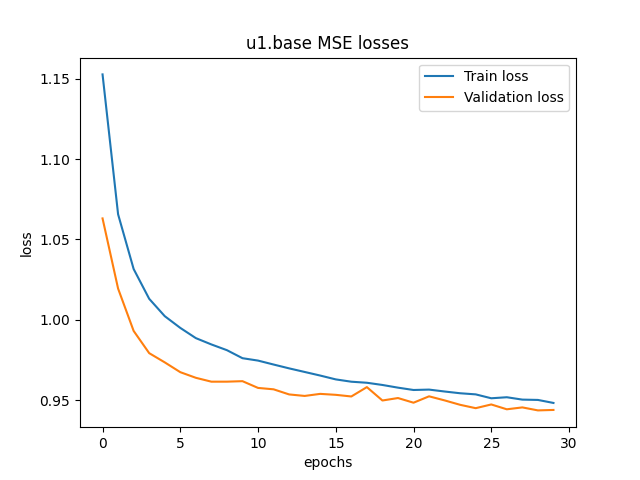

In [11]:
from IPython.display import Image
Image('reports/figures/train_1_losses.png')